***

<b>Task</b> : To build classifiers using different classifications algorithms to predict the Placement Status. <br>
<b>Dataset </b>: Campus Recruitment Dataset (https://www.kaggle.com/benroshan/factors-affecting-campus-placement)<br><br>
    <b>Features</b> : This data set consists of Placement data of students in our campus. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students
<br>
    <b>Target</b> :status- shows placement status of a student
    <br>
***

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn. neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble,svm
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,fbeta_score


## PART I : Data Preparation

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:/Data/Placement_Data_Full_Class.csv")

In [4]:
data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


## PART II : Exploratory Data Analysis

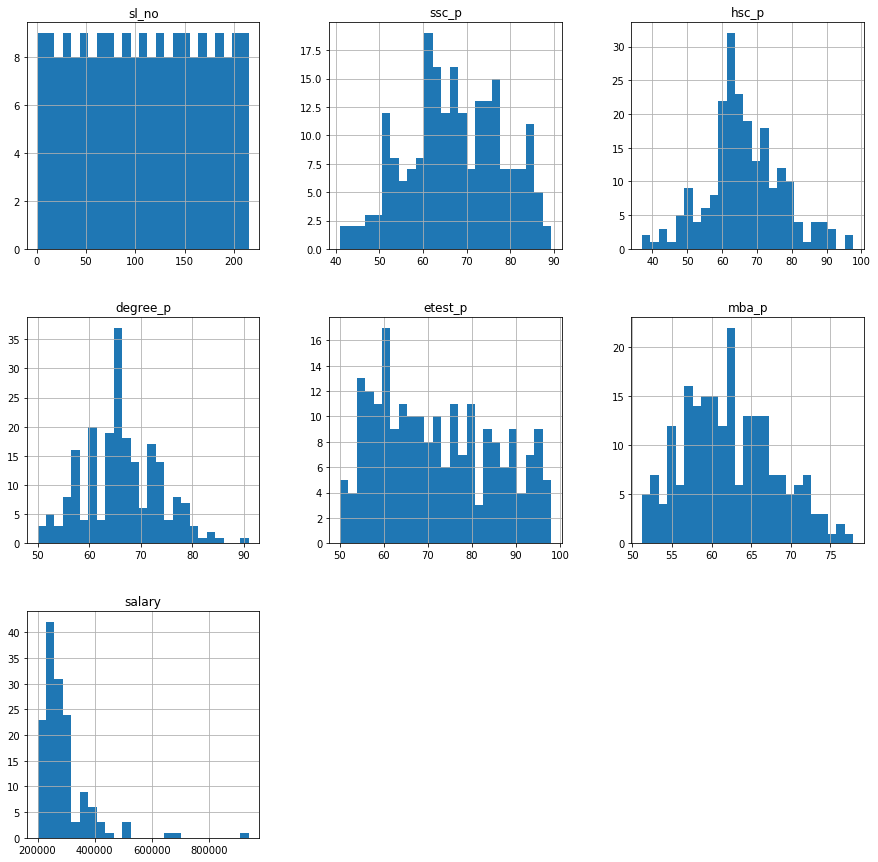

In [6]:
data.hist(bins=25, figsize=(15,15))
plt.show()

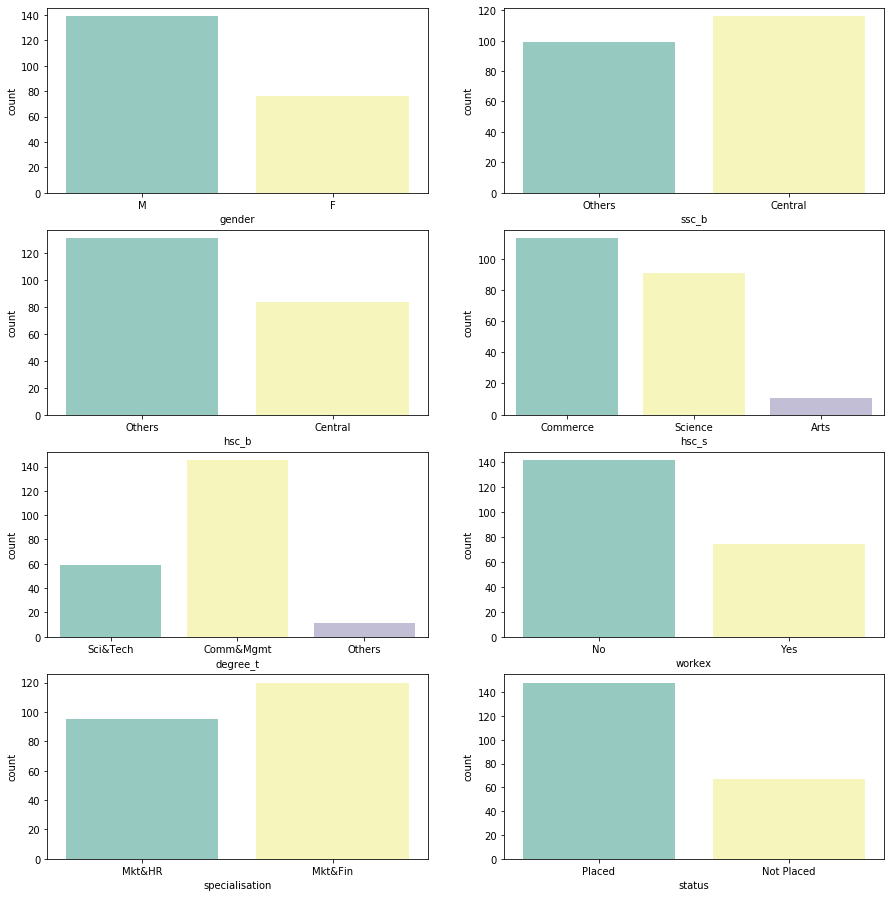

In [7]:
features = data[["gender","ssc_b","hsc_b","hsc_s","degree_t","workex","specialisation","status"]].columns
plt.figure(figsize=(15,8*4))
gs = gridspec.GridSpec(8, 2)
for i, c in enumerate(data[features]):
    ax = plt.subplot(gs[i])
    sns.countplot(data = data, x = c,palette="Set3")
plt.show()

## PART III : Data Cleaning

In [8]:
data.isna().any()

sl_no             False
gender            False
ssc_p             False
ssc_b             False
hsc_p             False
hsc_b             False
hsc_s             False
degree_p          False
degree_t          False
workex            False
etest_p           False
specialisation    False
mba_p             False
status            False
salary             True
dtype: bool

#### Replacing null values with 0 in salary column as those students are not placed.

In [9]:
data.groupby('status')['salary'].sum()

status
Not Placed           0.0
Placed        42721000.0
Name: salary, dtype: float64

In [10]:
data['salary'] = data['salary'].fillna(0)

In [11]:
data1 = data

#### converting Categorical variable with Numerical values.

In [12]:
data.gender = data.gender.replace({"M": 1, "F" : 0})
data.ssc_b = data.ssc_b.replace({"Others":1,"Central":0})
data.hsc_b = data.hsc_b.replace({"Others":1,"Central":0})
data.hsc_s = data.hsc_s.replace({"Commerce":2,"Science":1,"Arts":0})
data.degree_t = data.degree_t.replace({"Sci&Tech":2,"Comm&Mgmt":1,"Others":0})
data.workex = data.workex.replace({"Yes":1,"No":0})
data.specialisation = data.specialisation.replace({"Mkt&HR":1,"Mkt&Fin":0})
data.status = data.status.replace({"Placed":1,"Not Placed":0})


In [13]:
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,2,58.00,2,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,1,77.48,2,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,1,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,1,52.00,2,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,2,73.30,1,0,96.8,0,55.50,1,425000.0


#### Droping sl_no as it won't be needed

In [14]:
data=data.drop(['sl_no'], axis=1)

In [15]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,2,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,1,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,1,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,1,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,2,73.30,1,0,96.8,0,55.50,1,425000.0


## PART IV : Data Visuaization

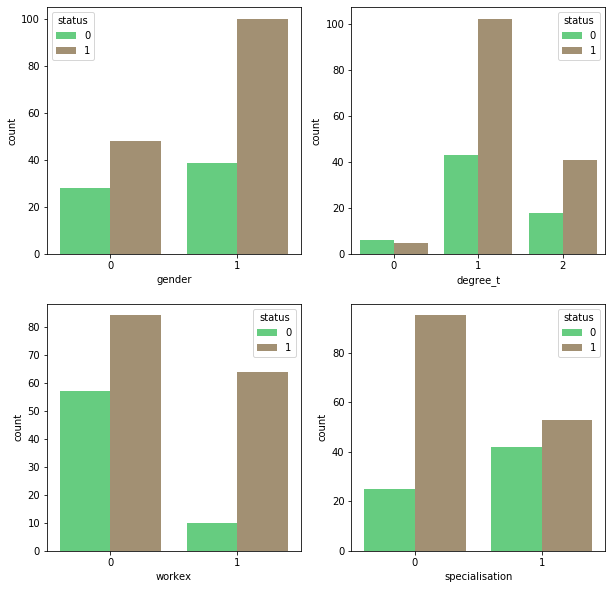

In [16]:
feature = ['gender','degree_t','workex','specialisation']
fig, ax = plt.subplots(2,2, figsize = (10,10))
axs=ax.ravel()
for i, feature in enumerate(feature):
    sns.countplot(x = feature, hue = 'status',ax=axs[i], data=data,palette="terrain")

**Visualization**
<li>Males are getting more placed compared to females.<br>
<li>Students have degree of Comm&Mgt are having high count of getting placed.<br>
<li>Students having work experience are likely to be placed but overall student with no work experience are also placed.<br>
<li>Marketing and HR Students are getting placed compared to Marketinf and Finance.

([<matplotlib.patches.Wedge at 0x27b93b5d788>,
 [Text(0.6136308257718237, 0.9129387765138416, 'Not Placed'),
  Text(-0.6136309112473185, -0.912938719061573, 'Placed')],
 [Text(0.3347077231482674, 0.49796660537118626, '31.16%'),
  Text(-0.3347077697712646, -0.4979665740335852, '68.84%')])

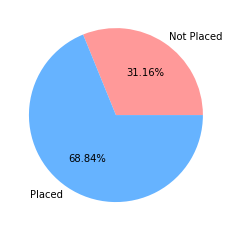

In [17]:
plt.pie(x = data.groupby(['status']).status.count(),
        labels = ["Not Placed", "Placed"], autopct='%1.2f%%',
        colors=['#ff9999','#66b3ff'])


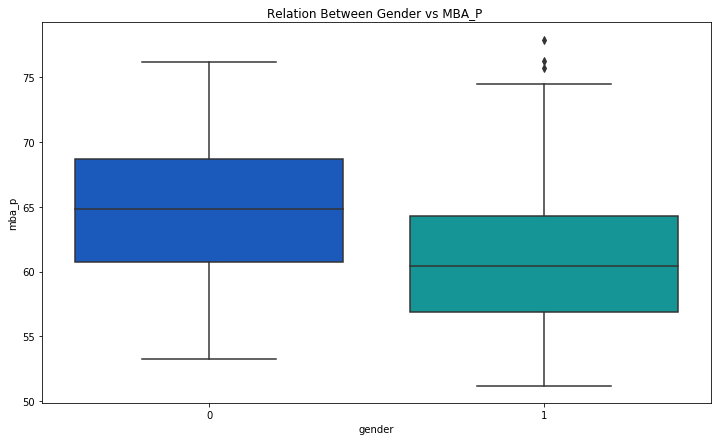

In [18]:
plt.figure(figsize=(12, 7))
plt.title("Relation Between Gender vs MBA_P ")

sns.boxplot(x='gender',y='mba_p',data=data,palette='winter')

In [19]:
gender = data.groupby('gender')['salary'].max()
gender

gender
0    650000.0
1    940000.0
Name: salary, dtype: float64

#### Observations -
<font color='blue'>Even though Females are scoring good in their MBA cources yet the salary packages of Males students is higher, also the number of Male students getting placed is higher compared to Females.</font>

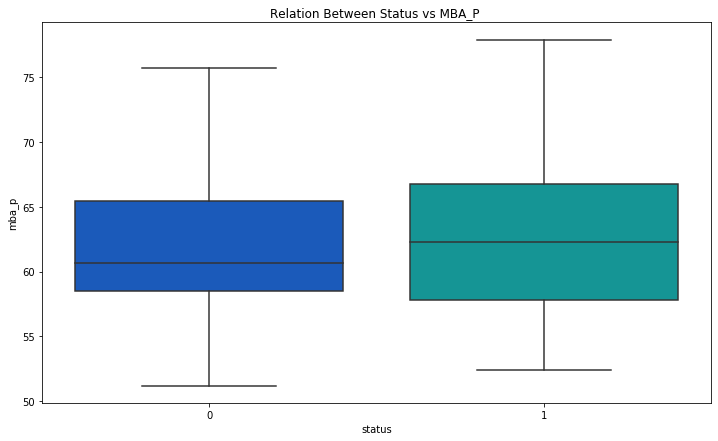

In [20]:
plt.figure(figsize=(12, 7))
plt.title("Relation Between Status vs MBA_P ")

sns.boxplot(x='status',y='mba_p',data=data,palette='winter')

## PART V : Spliting data set into training and test dataset

In [21]:
X=data.drop(['status','salary'], axis=1)
Y=data['status']

In [22]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,2,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,1,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,1,0,75.0,0,57.80
3,1,56.00,0,52.00,0,1,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,2,73.30,1,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,2,77.60,1,0,91.0,0,74.49
211,1,58.00,1,60.00,1,1,72.00,2,0,74.0,0,53.62
212,1,67.00,1,67.00,1,2,73.00,1,1,59.0,0,69.72
213,0,74.00,1,66.00,1,2,58.00,1,0,70.0,1,60.23


In [23]:
X_train, X_test, Y_train, Y_test = \
train_test_split(X, Y, test_size=0.3, random_state=42)

In [24]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions Y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions Y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (150, 12)
Number transactions Y_train dataset:  (150,)
Number transactions X_test dataset:  (65, 12)
Number transactions Y_test dataset:  (65,)


## PART VI : Training Model 

#### 1. Linear Regression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,Y_train)
Y_predict = lin_reg.predict(X_test)
score = lin_reg.score(X_test, Y_test)
linaccuracy = round(score*100,2)
print('accuracy_score percent :', linaccuracy)
msr = np.mean((Y_predict-Y_test)**2)
print("Mean Squared error on Test set : ",msr)

accuracy_score percent : 44.69
Mean Squared error on Test set :  0.12095301813663556


#### 2. Logistic Regression

In [26]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, Y_train)

y_pred = logistic_model.predict(X_test)

score = logistic_model.score(X_test, Y_test)
logaccuracy  = round(score*100,2)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
f2 = fbeta_score(Y_test, y_pred, beta=2.0)

print('Logistic Regression- ')
print('accuracy  : ', logaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)

Logistic Regression- 
accuracy  :  81.54
Precision :  0.8333333333333334
Recall    :  0.9090909090909091
F1 Score  :  0.8695652173913043
F2 Score  :  0.8928571428571429


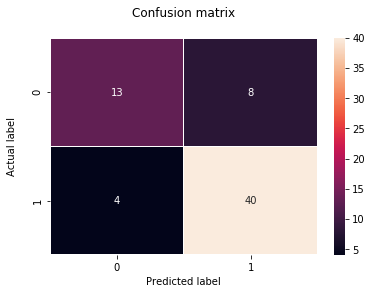

In [27]:
import seaborn as sns
cm = confusion_matrix(Y_test,y_pred)
f,ax = plt.subplots(figsize=(6,4))
sns.heatmap(cm,annot = True, linewidths = 0.5, fmt=".0f", ax=ax)
plt.title('Confusion matrix\n')
plt.xlabel('Predicted label\n')
plt.ylabel('Actual label\n')
plt.show()


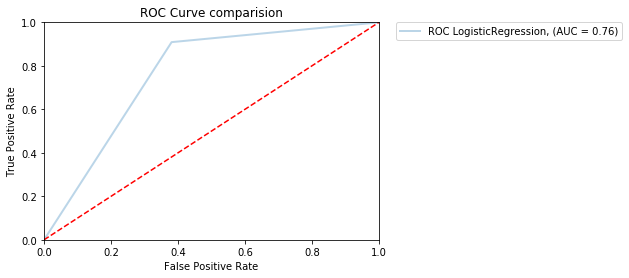

In [28]:
#Receiver operating characterstic curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

predicted = logistic_model.fit(X_train, Y_train).predict(X_test)
fp, tp, th = roc_curve(Y_test, predicted)

plt.plot(fp,tp,lw = 2, alpha = 0.3, label='ROC %s, (AUC = %0.2f)' %(logistic_model.__class__.__name__, auc(fp,tp)))


plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 3. Decision Tree Classifier

Decision Tree Classifier- 
accuracy  :  78.46
Precision :  0.84
Recall    :  0.84
F1 Score  :  0.84
F2 Score  :  0.84


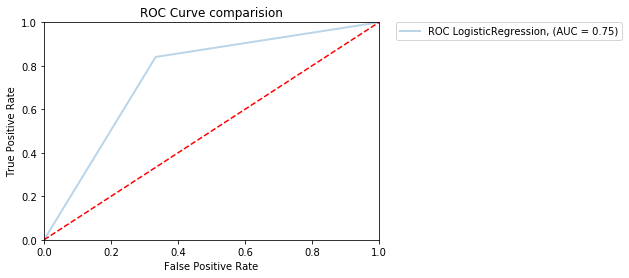

In [29]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, Y_train)
pred_dtc = dtc.predict(X_test)
score = dtc.score(X_test, Y_test)
dtcaccuracy = round(accuracy_score(Y_test,pred_dtc),4)*100


precision = round(precision_score(Y_test, pred_dtc),2)
recall = round(recall_score(Y_test, pred_dtc),2)
f1 = round(f1_score(Y_test, pred_dtc),2)
f2 = round(fbeta_score(Y_test, pred_dtc, beta=2.0),2)

print('Decision Tree Classifier- ')
print('accuracy  : ', dtcaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)

predicted = dtc.fit(X_train, Y_train).predict(X_test)

fp, tp, th = roc_curve(Y_test, pred_dtc)

plt.plot(fp,tp,lw = 2, alpha = 0.3, label='ROC %s, (AUC = %0.2f)' %(logistic_model.__class__.__name__, auc(fp,tp)))


plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 4. Random Forest Classifier

Random Forest Classifier- 
accuracy  :  80.0
Precision :  0.79
Recall    :  0.95
F1 Score  :  0.87
F2 Score  :  0.92


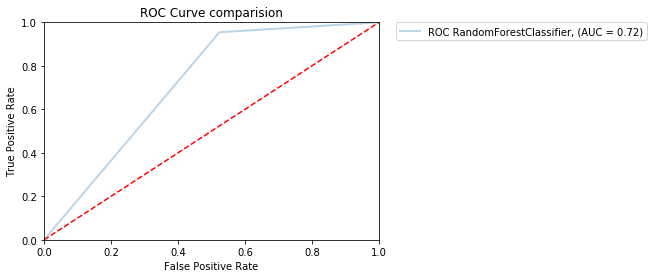

In [30]:
rfc = RandomForestClassifier(n_estimators = 72, criterion = 'entropy', random_state=0 )
rfc.fit(X_train, Y_train)
pred_rfc = rfc.predict(X_test)
score = rfc.score(X_test, Y_test)
rfcaccuracy = round(accuracy_score(Y_test,pred_rfc),4)*100


precision = round(precision_score(Y_test, pred_rfc),2)
recall = round(recall_score(Y_test, pred_rfc),2)
f1 = round(f1_score(Y_test, pred_rfc),2)
f2 = round(fbeta_score(Y_test, pred_rfc, beta=2.0),2)

print('Random Forest Classifier- ')
print('accuracy  : ', rfcaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)

predicted = rfc.fit(X_train,Y_train).predict(X_test)
fp, tp, th = roc_curve(Y_test, predicted)

plt.plot(fp,tp,lw = 2, alpha = 0.3, label='ROC %s, (AUC = %0.2f)' %(rfc.__class__.__name__, auc(fp,tp)))


plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### 5. K-Neighbour Classifier

K-Neighbour Classifier- 
accuracy  :  75.38
Precision :  0.77
Recall    :  0.91
F1 Score  :  0.8333333333333333
F2 Score  :  0.8771929824561403


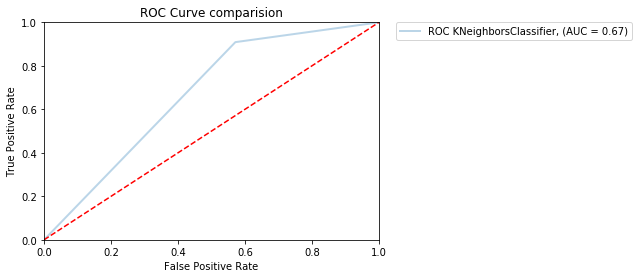

In [31]:
model_knn=KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train,Y_train)
pred_knn=model_knn.predict(X_test)
confusion_matrix(Y_test,pred_knn)


score = model_knn.score(X_test, Y_test)
knnaccuracy = round(accuracy_score(Y_test,pred_knn),4)*100


precision = round(precision_score(Y_test, pred_knn),2)
recall = round(recall_score(Y_test, pred_knn),2)
f1 = f1_score(Y_test, pred_knn)
f2 = fbeta_score(Y_test, pred_knn, beta=2.0)

print('K-Neighbour Classifier- ')
print('accuracy  : ', knnaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)

predicted = model_knn.fit(X_train, Y_train).predict(X_test)

fp, tp, th = roc_curve(Y_test, predicted)

plt.plot(fp,tp,lw = 2, alpha = 0.3, label='ROC %s, (AUC = %0.2f)' %(model_knn.__class__.__name__, auc(fp,tp)))


plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# PART VII: Improving model accuracy

AdaBoost Classifier- 
accuracy  :  76.92
Precision :  0.7959183673469388
Recall    :  0.8863636363636364
F1 Score  :  0.8387096774193548
F2 Score  :  0.8666666666666666


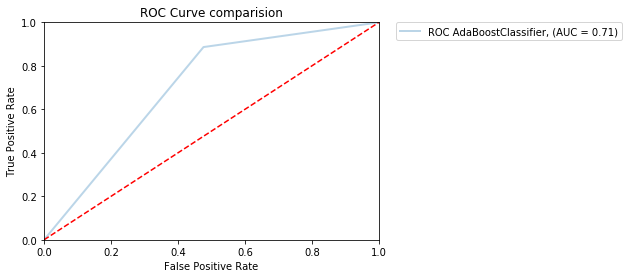

In [32]:
ada = ensemble.AdaBoostClassifier()
pred_ada = ada.fit(X_train,Y_train).predict(X_test)

score = ada.score(X_test, Y_test)
adaaccuracy = round(accuracy_score(Y_test,pred_ada),4)*100


precision = precision_score(Y_test, pred_ada)
recall = recall_score(Y_test, pred_ada)
f1 = f1_score(Y_test, pred_ada)
f2 = fbeta_score(Y_test, pred_ada, beta=2.0)

print('AdaBoost Classifier- ')
print('accuracy  : ', adaaccuracy)
print('Precision : ',precision)
print('Recall    : ', recall)
print('F1 Score  : ',f1)
print('F2 Score  : ',f2)

fp, tp, th = roc_curve(Y_test, pred_ada)

plt.plot(fp,tp,lw = 2, alpha = 0.3, label='ROC %s, (AUC = %0.2f)' %(ada.__class__.__name__, auc(fp,tp)))


plt.title('ROC Curve comparision')
plt.legend(bbox_to_anchor =(1.05,1), loc = 2, borderaxespad =0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
from sklearn.ensemble import VotingClassifier
m1 = LogisticRegression()
m2 = DecisionTreeClassifier(random_state=123)
m3 = RandomForestClassifier()
votingclf = VotingClassifier(estimators=[('lr', m1), ('dt', m2),('rf',m3)], voting='hard')


In [34]:

model_list = [
    ensemble.AdaBoostClassifier(n_estimators= 80),
    ensemble.BaggingClassifier(n_estimators =72, random_state=123),
    ensemble.GradientBoostingClassifier(n_estimators=70, random_state = 123),
    ensemble.RandomForestClassifier(),
    svm.SVC(),
    votingclf,
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(max_iter=1000)
]

In [35]:
cols =[]
model_table =pd.DataFrame(columns = cols)

count = 0
for i in model_list:
    pred_model = i.fit(X_train,Y_train).predict(X_test)
    fp,tp,th = roc_curve(Y_test, pred_model)
    cm = confusion_matrix(Y_test,pred_model)
    model_table.loc[count,'Algorithm'] = i.__class__.__name__
    model_table.loc[count,'Train Accuracy'] = round(i.score(X_train, Y_train),2)*100
    model_table.loc[count,'Test Accuracy'] = round(i.score(X_test, Y_test),2)*100
    model_table.loc[count,'Sensitivity'] = round(tp[1],2)
    model_table.loc[count,'Specificity'] = 1-round(fp[1],2)
    model_table.loc[count,'Precision'] = round(precision_score(Y_test, pred_model),2)
    model_table.loc[count,'F1 Score'] = round(f1_score(Y_test, pred_model),2)
    model_table.loc[count,'F2 Score'] = round(fbeta_score(Y_test, pred_model, beta=2.0),2)
    count+=1
model_table.sort_values(by = ['Test Accuracy', 'Precision', 'Sensitivity'], ascending = False, inplace = True)
model_table

,Algorithm,Train Accuracy,Test Accuracy,Sensitivity,Specificity,Precision,F1 Score,F2 Score
5,VotingClassifier,100.0,85.0,0.95,0.62,0.84,0.89,0.93
2,GradientBoostingClassifier,100.0,83.0,0.91,0.67,0.85,0.88,0.90
7,LogisticRegression,90.0,82.0,0.91,0.62,0.83,0.87,0.89
1,BaggingClassifier,100.0,82.0,0.95,0.52,0.81,0.88,0.92
3,RandomForestClassifier,100.0,80.0,0.95,0.48,0.79,0.87,0.92
0,AdaBoostClassifier,100.0,78.0,0.91,0.52,0.80,0.85,0.88
4,SVC,85.0,78.0,0.95,0.43,0.78,0.86,0.91
6,KNeighborsClassifier,94.0,75.0,0.91,0.43,0.77,0.83,0.88


# PART VIII : Model Selection and Performance

Feature  0  Score:  0.0
Feature  1  Score:  0.125
Feature  2  Score:  0.0
Feature  3  Score:  0.2375
Feature  4  Score:  0.0
Feature  5  Score:  0.0
Feature  6  Score:  0.225
Feature  7  Score:  0.0
Feature  8  Score:  0.075
Feature  9  Score:  0.125
Feature  10  Score:  0.0125
Feature  11  Score:  0.2


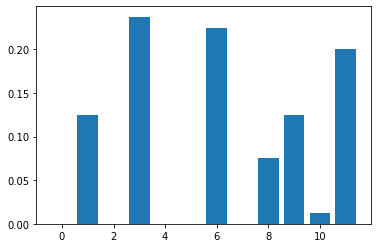

In [36]:
m =ensemble.AdaBoostClassifier(n_estimators= 80)
pred =m.fit(X_train, Y_train).predict(X_test)
imp = m.feature_importances_

for i,v in enumerate(imp):
    print("Feature ",i," Score: ",v)
plt.bar([x for x in range(len(imp))],imp)
plt.show()

Feature  0  Score:  0.0007830619373312137
Feature  1  Score:  0.5406982267502916
Feature  2  Score:  0.00016804072283447858
Feature  3  Score:  0.13059728172733953
Feature  4  Score:  0.0008506864763334548
Feature  5  Score:  4.71268653097443e-05
Feature  6  Score:  0.12484548608897293
Feature  7  Score:  0.00039964819687643655
Feature  8  Score:  0.031590989917977305
Feature  9  Score:  0.035656095498104196
Feature  10  Score:  0.02862918193127047
Feature  11  Score:  0.10573417388735863


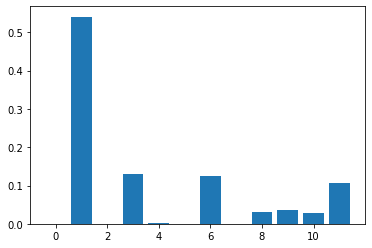

In [37]:
m =ensemble.GradientBoostingClassifier(n_estimators=70, random_state = 123)
pred =m.fit(X_train, Y_train).predict(X_test)
imp = m.feature_importances_

for i,v in enumerate(imp):
    print("Feature ",i," Score: ",v)
plt.bar([x for x in range(len(imp))],imp)
plt.show()

# PART IX : Conclusion

<li>From EDA we observed that number of Males are getting more placed than compared to females.
Students have degree of Comm&Mgt are having high count of getting placed.
Students having work experience are likely to be placed but overall student with no work experience are also placed.
Marketing and HR Students are getting placed compared to Marketinf and Finance.
<li>Even though Females are scoring good in their MBA cources yet the salary packages of Males students is higher, also the number of Male students getting placed is higher compared to Females.
<li>Form all the 12 features taken we can say that, percentages from 10th class to MBA are taken into consideration for a student to get placed,
apart from that work experiance can also help student getting places.

****